In [46]:
# Simple t test on our dataset preprocessed in our way

from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

dataset = load_dataset("Alljoined/05_125", split="train", cache_dir="/srv/eeg_reconstruction/shared")

In [24]:
coco_ids = dataset['coco_id']
subject_ids = dataset['subject_id']

In [40]:
def getSubDiff(subject = 1, firstImage = 268114, secondImage = 65029):
    # load image 1
    imageSet1Index = [i for i in list(range(len(coco_ids))) if coco_ids[i] == firstImage and subject_ids[i] == subject][0]
    imageSet1 = dataset[imageSet1Index]

    # load image 2
    imageSet2Index = [i for i in list(range(len(coco_ids))) if coco_ids[i] == secondImage and subject_ids[i] == subject][0]
    imageSet2 = dataset[imageSet2Index]

    eeg1 = np.array(imageSet1["EEG"])
    eeg2 = np.array(imageSet2["EEG"])

    return eeg1-eeg2

In [41]:
# randomly sample 1000 image pairs

import random

unique_coco_ids = list(set(coco_ids))
numClasses = len(unique_coco_ids)
image_pairs = []

while len(image_pairs) < 100:
    pair = random.sample(range(numClasses), 2)
    image_pairs.append(pair)

print(image_pairs)

[[495, 477], [121, 665], [7, 692], [710, 362], [448, 651], [576, 753], [160, 737], [212, 563], [509, 82], [537, 622], [43, 754], [315, 415], [151, 726], [161, 146], [717, 129], [679, 492], [504, 381], [99, 763], [397, 302], [216, 497], [301, 719], [492, 753], [719, 697], [719, 275], [99, 456], [18, 70], [122, 520], [684, 539], [200, 12], [148, 404], [585, 36], [33, 569], [693, 302], [642, 492], [413, 299], [648, 165], [720, 378], [565, 64], [103, 511], [106, 736], [287, 494], [431, 36], [622, 140], [609, 31], [349, 639], [220, 289], [584, 64], [304, 136], [755, 379], [480, 243], [303, 360], [392, 181], [240, 33], [230, 34], [54, 761], [640, 345], [324, 264], [681, 561], [689, 343], [654, 473], [217, 26], [285, 322], [103, 352], [343, 625], [424, 663], [178, 94], [714, 127], [556, 743], [187, 106], [96, 763], [74, 544], [747, 206], [331, 128], [44, 385], [17, 559], [357, 673], [417, 176], [522, 487], [89, 704], [382, 63], [708, 460], [587, 65], [452, 22], [673, 52], [312, 305], [77, 619

In [43]:
channels = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'Status']
time_win = (.080, .140)
electrodes = ('O1', 'O2', 'PO7', 'PO8', 'Pz', 'P3', 'P4')
roi = [channels.index(e) for e in electrodes]

In [44]:
tvals = []
pvals = []

subjects = list(range(1,9))

for pair in image_pairs:
    differences = np.array([getSubDiff(sub, unique_coco_ids[pair[0]], unique_coco_ids[pair[1]]) for sub in subjects])
    #print(differences.shape) #(10, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    y = np.mean(y, axis=2)
    #print(y.shape) #(10, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

    if (pval[0] > 0.99):
        print('IMAGE IDS WITH P VAL: ' + str(pval[0]))
        print(unique_coco_ids[pair[0]])
        print(unique_coco_ids[pair[1]])


IMAGE IDS WITH P VAL: 0.994432961574302
229233
139561
IMAGE IDS WITH P VAL: 0.990787726081278
405437
223718


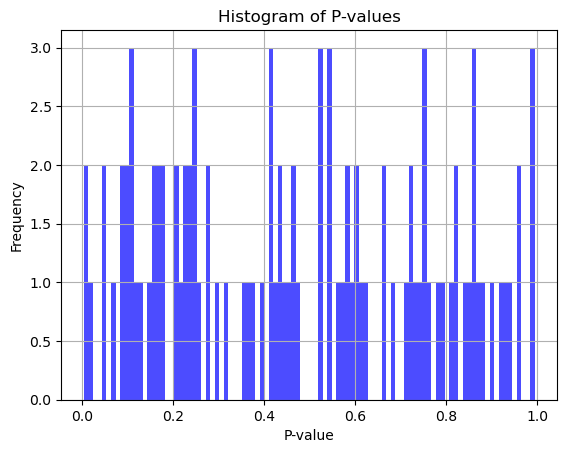

In [47]:
plt.hist(pvals, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:

subjects = list(range(1,9))
differences = np.array([getSubDiff(sub) for sub in subjects])

Getting eeg data for 1
Getting eeg data for 2
Getting eeg data for 3
Getting eeg data for 4
Getting eeg data for 5
Getting eeg data for 6
Getting eeg data for 7
Getting eeg data for 8


In [16]:
differences.shape

(8, 64, 334)

In [22]:
y = differences[:, roi, int(time_win[0]*512) : int(time_win[1]*512)]
print(y.shape) #(7, 7, 31)
y = np.mean(y, axis=2)
print(y.shape) #(7, 7)
t, pval = stats.ttest_1samp(y, 0)

(8, 7, 31)
(8, 7)


In [23]:
print(round(pval[0], 4))

0.1767


## Inter-subject test